# Visualizing the Titanic Disaster

Check out [Titanic Visualization Exercises Video Tutorial](https://youtu.be/CBT0buoF_Ns) to watch a data scientist go through the exercises

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv) 

In [3]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv'

### Step 3. Assign it to a variable titanic 

In [85]:
titanic = pd.read_csv(url)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 4. Set PassengerId as the index 

In [5]:
titanic.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

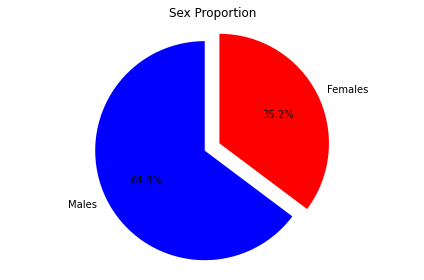

In [6]:
# sum the instances of males and females
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

# put them into a list called proportions
proportions = [males, females]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Males', 'Females'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion")

# View the plot
plt.tight_layout()
plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

(-5.0, 85.0)

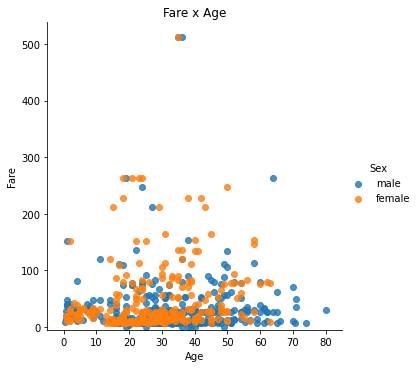

In [29]:
# creates the plot using
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

# set title
lm.set(title = 'Fare x Age')

# get the axes object and tweak it
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

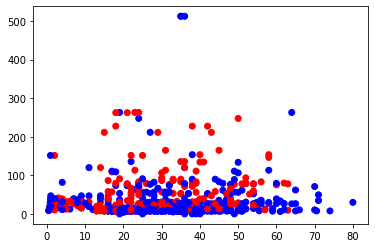

In [8]:
c_map = {'male': 'b', 'female': 'r'}
fig, ax = plt.subplots(1, 1)
ax.scatter(titanic["Age"], titanic["Fare"], c=[c_map[_] for _ in titanic["Sex"]])

### Step 7. How many people survived?

In [9]:
titanic.Survived.sum()

342

### Step 8. Create a histogram with the Fare payed

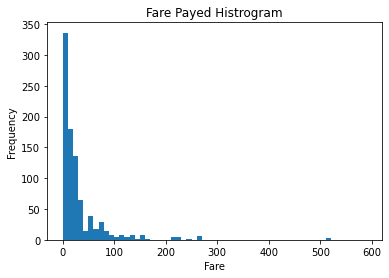

In [10]:
# sort the values from the top to the least value and slice the first 5 items
df = titanic.Fare.sort_values(ascending = False)
df

# create bins interval using numpy
binsVal = np.arange(0,600,10)
binsVal

# create the plot
plt.hist(df, bins = binsVal)

# Set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

# show the plot
plt.show()

### BONUS: Create your own question and answer it.

<AxesSubplot:>

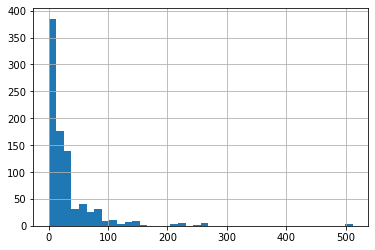

In [105]:
#Quick histogram of Fare
titanic['Fare'].hist(bins=40)

In [81]:
##Are the highest fare payers from the same family? And where did they stay?
for x in range(len(titanic)):
    if titanic.Fare[x] == titanic.Fare.max():
        print(titanic.Name[x]+' '+str(titanic.Cabin[x]))
print(str(titanic.Fare.max())+' MU')

Ward, Miss. Anna nan
Cardeza, Mr. Thomas Drake Martinez B51 B53 B55
Lesurer, Mr. Gustave J B101
512.3292 MU


In [82]:
##Are the lowest fare payers from the same family? And where did they stay?
for x in range(len(titanic)):
    if titanic.Fare[x] == titanic.Fare.min():
        print(titanic.Name[x]+' '+str(titanic.Cabin[x]))
print(str(titanic.Fare.min())+' MU')

Leonard, Mr. Lionel nan
Harrison, Mr. William B94
Tornquist, Mr. William Henry nan
Parkes, Mr. Francis "Frank" nan
Johnson, Mr. William Cahoone Jr nan
Cunningham, Mr. Alfred Fleming nan
Campbell, Mr. William nan
Frost, Mr. Anthony Wood "Archie" nan
Johnson, Mr. Alfred nan
Parr, Mr. William Henry Marsh nan
Watson, Mr. Ennis Hastings nan
Knight, Mr. Robert J nan
Andrews, Mr. Thomas Jr A36
Fry, Mr. Richard B102
Reuchlin, Jonkheer. John George nan
0.0 MU


<AxesSubplot:>

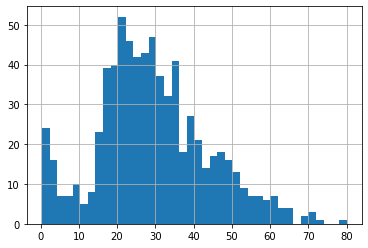

In [106]:
titanic['Age'].hist(bins=40)

<AxesSubplot:>

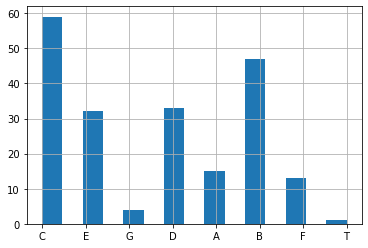

In [150]:
# Which deck had most people?
deck = titanic['Cabin'].dropna()
deck.count()
#Get the floor letter
#titanic['Cabin'][1][0]
floor = []
for x in deck:
    floor.append(x[0])
from pandas import Series,DataFrame
floor_df = DataFrame(floor)
floor_df.columns = ['Cabin']
#floor_df['Cabin'].count()
floor_df['Cabin'].hist(bins=15)
